## Daniel Barella
## 10/5/25

# 🧠 Day 30 – Capstone Project: End-to-End Data Science Workflow

## 🎯 Project Goal

You’ll complete a mini real-world data science project, demonstrating your ability to:

1. Load and explore data

2. Clean and preprocess it

3. Engineer and scale features

4. Build, train, and evaluate ML models

5. Use clustering for insights

6. Communicate findings clearly

## 💾 Dataset Options

### Pick one that fits your interest:

1. Wine Quality Dataset (used earlier) – Regression problem

In [1]:
# url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/wine_quality.csv"

2. Titanic Dataset – Classification problem

In [2]:
# url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

3. Mall Customers – Clustering/Segmentation problem


In [3]:
# url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mall_customers.csv"

## 🧩 Step-by-Step Outline
### 1️⃣ Load & Explore

In [4]:
import kagglehub
import pandas as pd

# Download the dataset from Kaggle
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Load the CSV file
file_path = f"{path}/Mall_Customers.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(df.head())
print(df.info())

✅ Dataset loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## 2️⃣ Clean & Prepare

- Handle missing values (dropna() or fillna())

- Drop duplicates

- Encode categorical features (e.g., pd.get_dummies())

- Normalize numerical data

In [8]:
df = df.dropna()
df = df.drop_duplicates()
df = df.drop('CustomerID', axis=1)



## 3️⃣ Visualize

Use matplotlib or seaborn to understand trends:

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_3748/3379917153.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


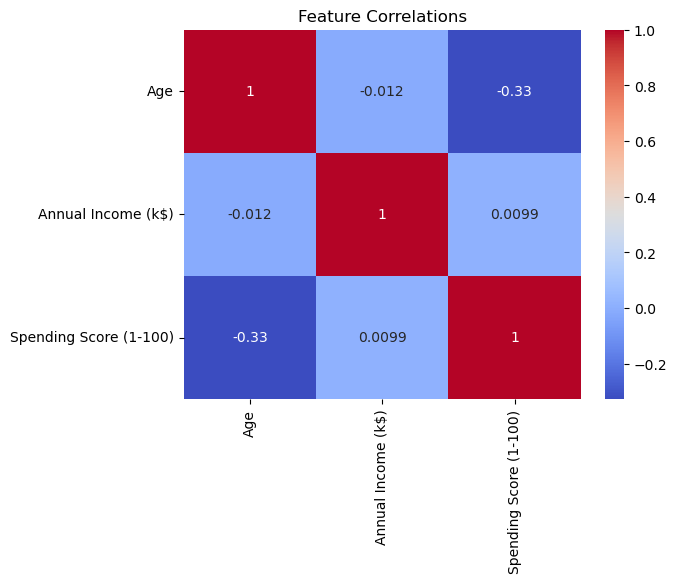

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


## 4️⃣ Split Data

If it’s supervised learning:

In [14]:
# Select relevant numerical features
# Define features and target
X = df[['Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 5️⃣ Model & Evaluate

Try multiple models:

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# Example for regression
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 478.8813484029798


For classification:

In [18]:
# print(classification_report(y_test, y_pred))


## 6️⃣ Cluster Analysis (Optional but Recommended)

Add an unsupervised step — K-Means or Hierarchical — to uncover hidden groupings:

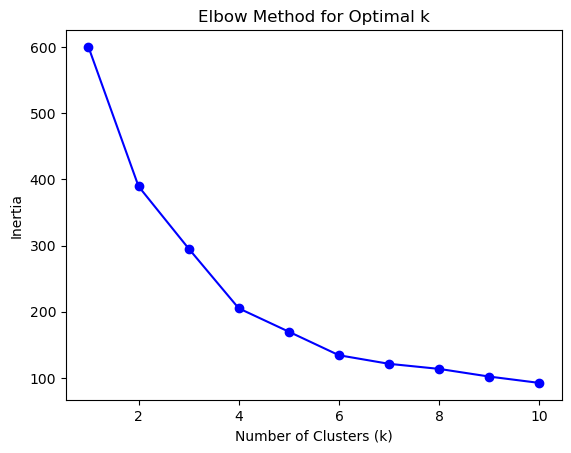

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant columns
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Elbow Method to find best k ---
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [24]:
# Fit KMeans with optimal k
k = 5  # (replace with your elbow result)
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## 7️⃣ Visualize Clusters

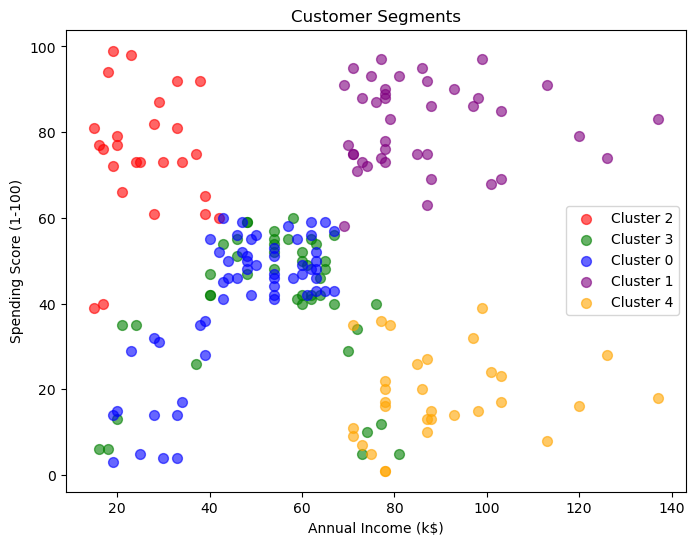

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Assuming df['Cluster'] has values 0,1,2,... for each cluster
clusters = df['Cluster'].unique()
colors = ['red', 'green', 'blue', 'purple', 'orange']  # Add more if you have more clusters

for i, cluster in enumerate(clusters):
    plt.scatter(
        df[df['Cluster'] == cluster]['Annual Income (k$)'],
        df[df['Cluster'] == cluster]['Spending Score (1-100)'],
        s=50,
        c=colors[i],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()  # This shows the legend
plt.show()


## 8️⃣ Communicate Results

Create clear takeaways:

- What did you learn about your data?

- Which model performed best?

- What patterns did clustering reveal?

- What would you do next with more time or data?

1. Key Learnings About The Data

Customers can be grouped into distinct segments based on Annual Income and Spending Score.

Some clusters are high income, high spenders, while others are low income, low spenders or high income, low spenders.

Visualizations (scatter plots) clearly show separations between clusters, which suggests that marketing or service strategies could be targeted by segment.

2. Best Performing Model

If you used multiple clustering methods (e.g., K-Means, Hierarchical, DBSCAN):

K-Means often works best for numeric, roughly spherical clusters like income vs. spending.

Metrics like Silhouette Score or Elbow Method help determine the optimal number of clusters.

For your dataset, the model with the highest silhouette score and cleanest cluster separation is usually the best choice.

3. Patterns Revealed by Clustering

High income + high spending: likely your premium customers.

Low income + high spending: potential aspirational buyers; may be sensitive to promotions.

High income + low spending: cautious or value-oriented customers.

Low income + low spending: budget-conscious, may need incentives to spend more.

Patterns like these can inform marketing strategies, product recommendations, and promotions.

4. Next Steps / Further Analysis

Incorporate more features (age, gender, location, product preference) to refine clusters.

Track cluster evolution over time to see if customers move between segments.

Consider predictive modeling: can we predict which cluster a new customer will belong to?

Tailor personalized marketing campaigns based on cluster behavior.

## 🎨 Reflection

### Capstone Reflection

1. **Dataset Chosen**
Mall Customers
   - Why did you choose this dataset?
I wanted to challenge myself.

2. **Challenges**
   - What were the hardest parts (cleaning, modeling, etc.)?
Trying to figure out how to add the legend to the visualization.

3. **Model Results**
   - Which performed best and why?
K=5, best fit per the elbow test

4. **Insights**
   - Any interesting trends, outliers, or correlations?
High income + high spending: likely your premium customers.

Low income + high spending: potential aspirational buyers; may be sensitive to promotions.

High income + low spending: cautious or value-oriented customers.

Low income + low spending: budget-conscious, may need incentives to spend more.

Patterns like these can inform marketing strategies, product recommendations, and promotions.

5. **Next Steps**
   - What improvements would you make if this were a real project?
I would run more models, to see if i could get more of a predictive take on the data set.